Create new data frame from analysis insights 

In [57]:
# # Import libraries for pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import libraries for model selection

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [58]:
# import csv file

df = pd.read_csv('../Preprocessing/masterupdateafter2000.csv')
df_2 = pd.read_csv('../Preprocessing/playerswithclub.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,Avg>2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA
0,03/08/07,Mechelen,Anderlecht,0.0,1.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/08/07,Charleroi,Roeselare,1.0,1.0,D,1.0,0.0,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/08/07,Club Brugge,Bergen,2.0,1.0,H,1.0,1.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/08/07,Dender,Germinal,1.0,2.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04/08/07,FC Brussels,Westerlo,0.0,1.0,A,0.0,0.0,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
import pandas as pd

# Full-time result for Away Team
away_team_ftr = df[df['FTR'] == 'A']['AwayTeam'].value_counts()

# Full-time result for Home Team
home_team_ftr = df[df['FTR'] == 'H']['HomeTeam'].value_counts()

# Goals scored by Away Team
goals_away = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False)

# Goals scored by Home Team
goals_home = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False)

# Shots on target by Away Team
shots_on_target_away = df.groupby('AwayTeam')['AST'].sum().sort_values(ascending=False)

# Shots on target by Home Team
shots_on_target_home = df.groupby('HomeTeam')['HST'].sum().sort_values(ascending=False)

# Head-to-Head Records between HomeTeam and AwayTeam
h2h_records = df.groupby(['HomeTeam', 'AwayTeam'])['FTR'].value_counts().unstack(fill_value=0)

# Displaying the results
print("Full Time Result for Away Team:\n", away_team_ftr.head())
print("\nFull Time Result for Home Team:\n", home_team_ftr.head())
print("\nGoals Scored by Away Team:\n", goals_away.head())
print("\nGoals Scored by Home Team:\n", goals_home.head())
print("\nShots on Target by Away Team:\n", shots_on_target_away.head())
print("\nShots on Target by Home Team:\n", shots_on_target_home.head())
print("\nHead-to-Head Records:\n", h2h_records.head())




# calculate win streaks for home team and away team

# Calculate win streaks

def win_streaks(df, team):
    wins = df['FTR'][df['HomeTeam'] == team].apply(lambda x: 1 if x == 'H' else 0).values
    streaks = []
    streak = 0
    for i in range(len(wins)):
        if wins[i] == 1:
            streak += 1
        else:
            streaks.append(streak)
            streak = 0
    streaks.append(streak)
    return max(streaks)

# Calculate win streaks for home team

df['HomeTeamWinStreak'] = df['HomeTeam'].apply(lambda x: win_streaks(df, x))

# Calculate win streaks for away team

df['AwayTeamWinStreak'] = df['AwayTeam'].apply(lambda x: win_streaks(df, x))

# Calculate loss streaks

def loss_streaks(df, team):
    wins = df['FTR'][df['HomeTeam'] == team].apply(lambda x: 1 if x == 'A' else 0).values
    streaks = []
    streak = 0
    for i in range(len(wins)):
        if wins[i] == 1:
            streak += 1
        else:
            streaks.append(streak)
            streak = 0
    streaks.append(streak)
    return max(streaks)

# Calculate loss streaks for home team

df['HomeTeamLossStreak'] = df['HomeTeam'].apply(lambda x: loss_streaks(df, x))

# Calculate loss streaks for away team

df['AwayTeamLossStreak'] = df['AwayTeam'].apply(lambda x: loss_streaks(df, x))





Full Time Result for Away Team:
 AwayTeam
Club Brugge    182
Anderlecht     176
Gent           144
Genk           134
Standard       132
Name: count, dtype: int64

Full Time Result for Home Team:
 HomeTeam
Club Brugge    266
Anderlecht     262
Genk           221
Standard       213
Gent           205
Name: count, dtype: int64

Goals Scored by Away Team:
 AwayTeam
Club Brugge    635.0
Anderlecht     604.0
Genk           562.0
Gent           541.0
Standard       525.0
Name: FTAG, dtype: float64

Goals Scored by Home Team:
 HomeTeam
Club Brugge    858.0
Anderlecht     858.0
Genk           724.0
Gent           693.0
Standard       675.0
Name: FTHG, dtype: float64

Shots on Target by Away Team:
 AwayTeam
Club Brugge    635.0
Gent           618.0
Genk           585.0
Charleroi      522.0
Antwerp        514.0
Name: AST, dtype: float64

Shots on Target by Home Team:
 HomeTeam
Club Brugge    776.0
Gent           701.0
Genk           693.0
Anderlecht     650.0
Antwerp        613.0
Name: HST, dtyp

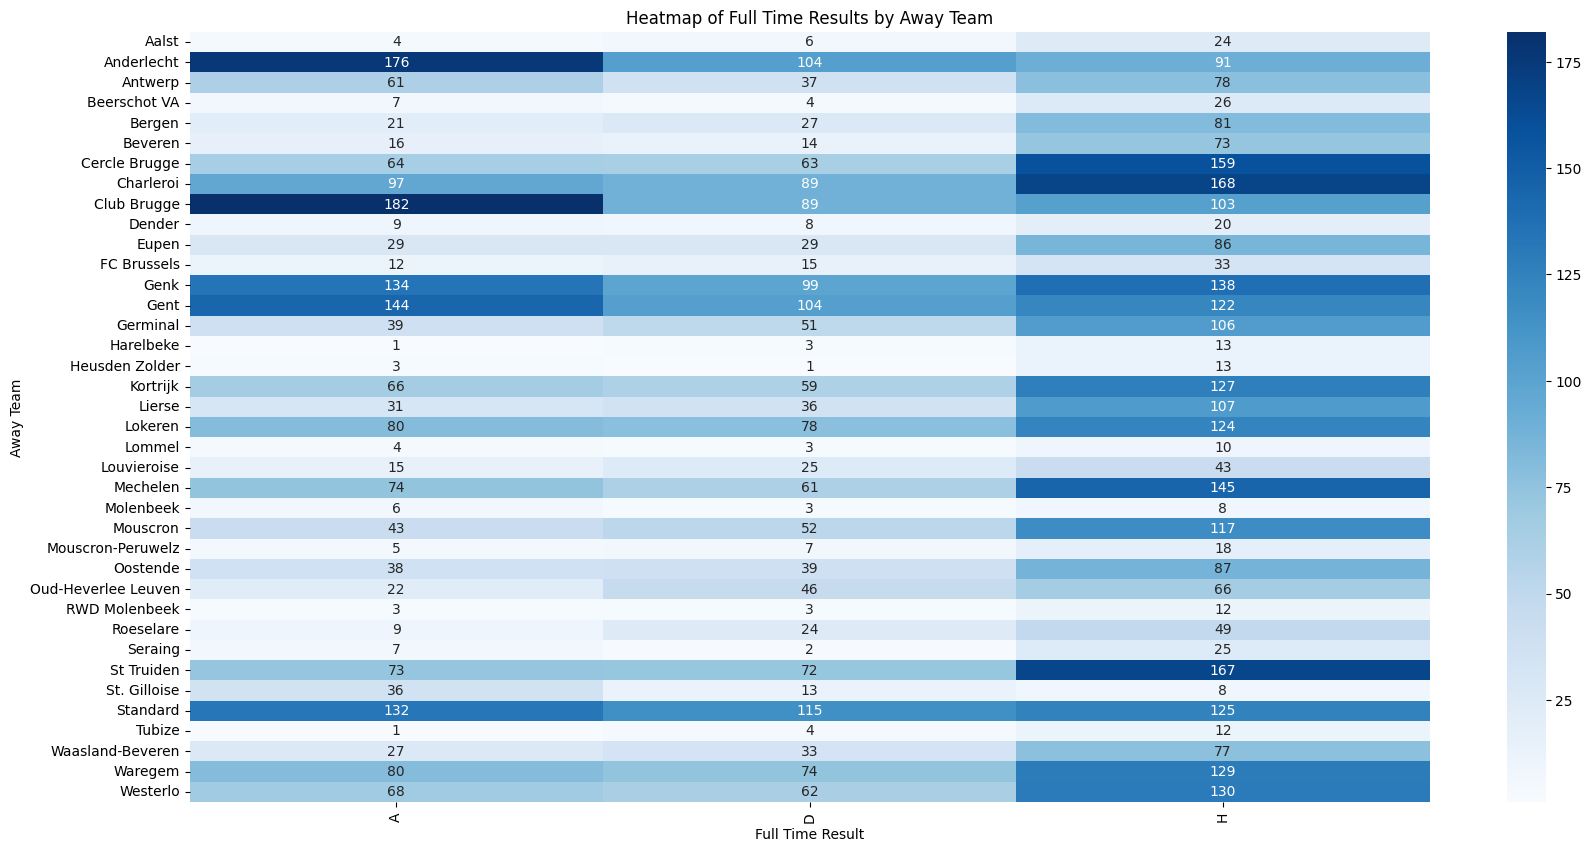

In [60]:
# Full time result for awayteam

plt.figure(figsize=(20, 10))
heatmap_data = pd.crosstab(df['AwayTeam'], df['FTR'])
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt="d")
plt.title('Heatmap of Full Time Results by Away Team')
plt.xlabel('Full Time Result')
plt.ylabel('Away Team')
plt.xticks(rotation=90)
plt.show()

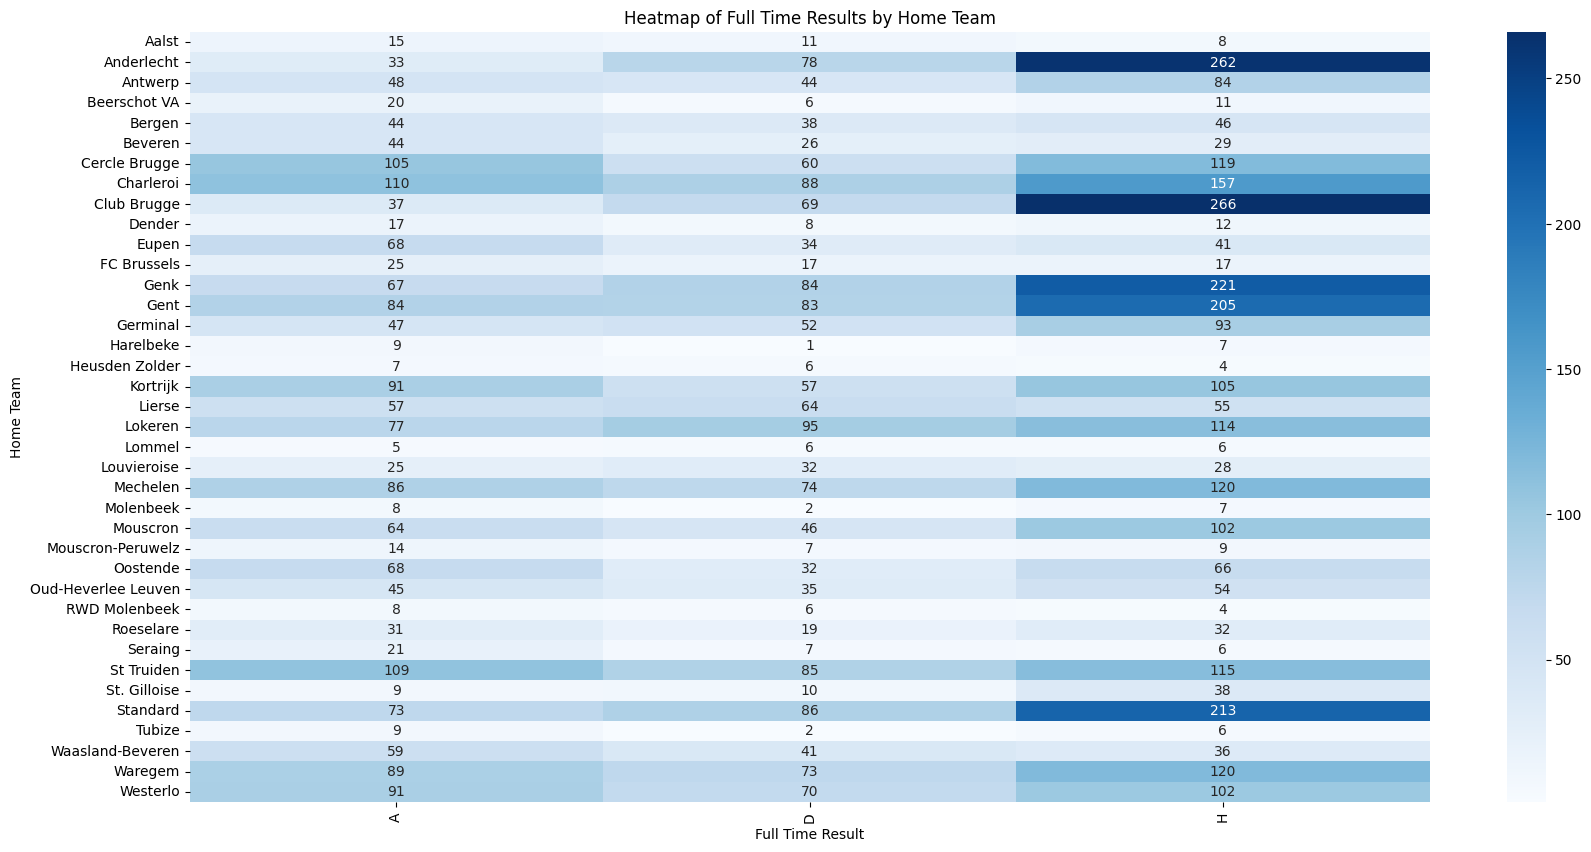

In [61]:
# Full time result for hometeam

plt.figure(figsize=(20, 10))
heatmap_data = pd.crosstab(df['HomeTeam'], df['FTR'])
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt="d")
plt.title('Heatmap of Full Time Results by Home Team')
plt.xlabel('Full Time Result')
plt.ylabel('Home Team')
plt.xticks(rotation=90)
plt.show()

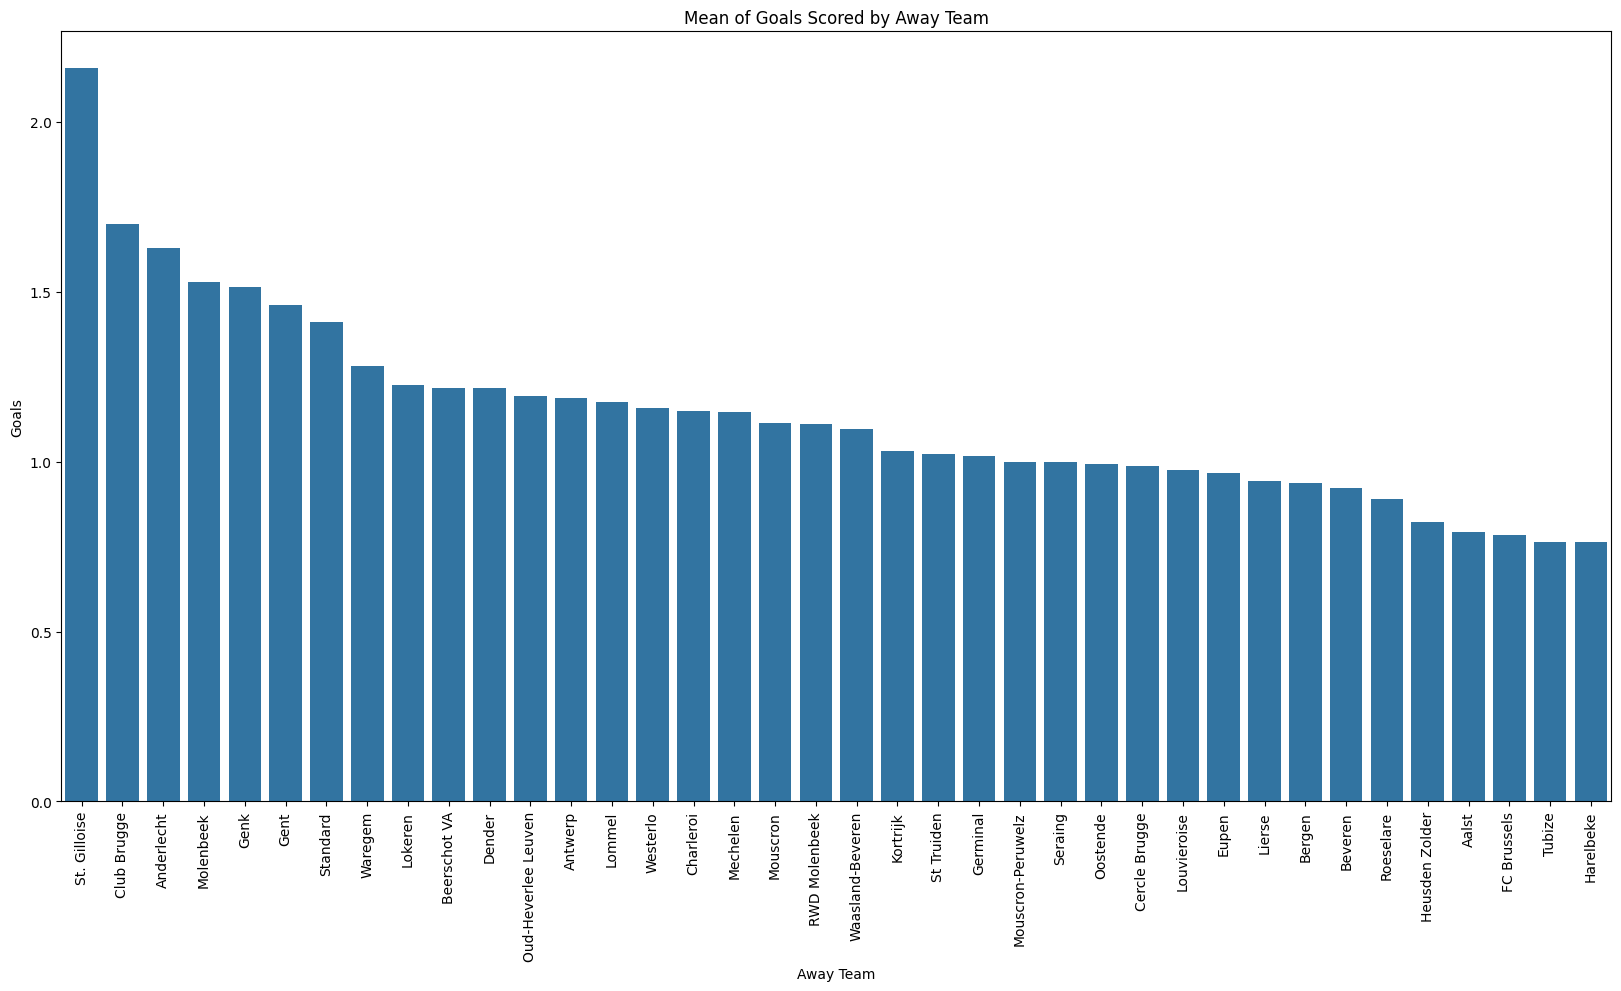

In [62]:
# Mean of goals scored by awayteam

plt.figure(figsize=(20, 10))
sns.barplot(x=df['FTAG'].groupby(df['AwayTeam']).mean().sort_values(ascending=False).index,y=df['FTAG'].groupby(df['AwayTeam']).mean().sort_values(ascending=False))
plt.title('Mean of Goals Scored by Away Team')
plt.xlabel('Away Team')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.show()

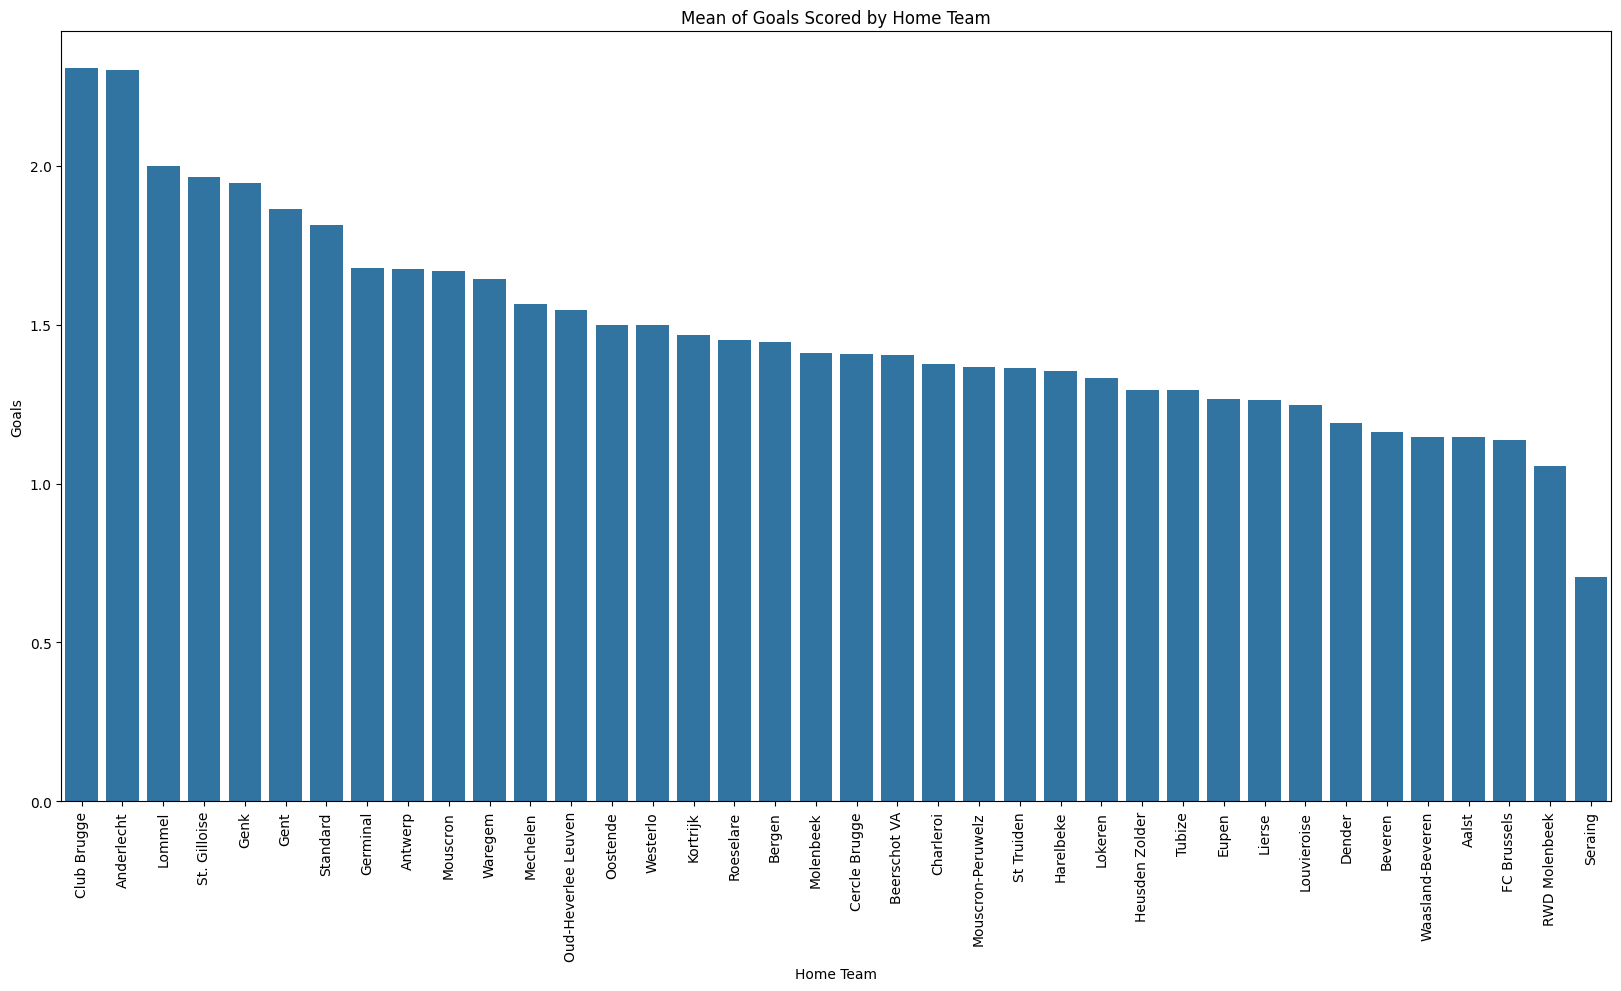

In [63]:
# Mean of goals scored by hometeam

plt.figure(figsize=(20, 10))
sns.barplot(x=df['FTHG'].groupby(df['HomeTeam']).mean().sort_values(ascending=False).index,y=df['FTHG'].groupby(df['HomeTeam']).mean().sort_values(ascending=False))
plt.title('Mean of Goals Scored by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.show()



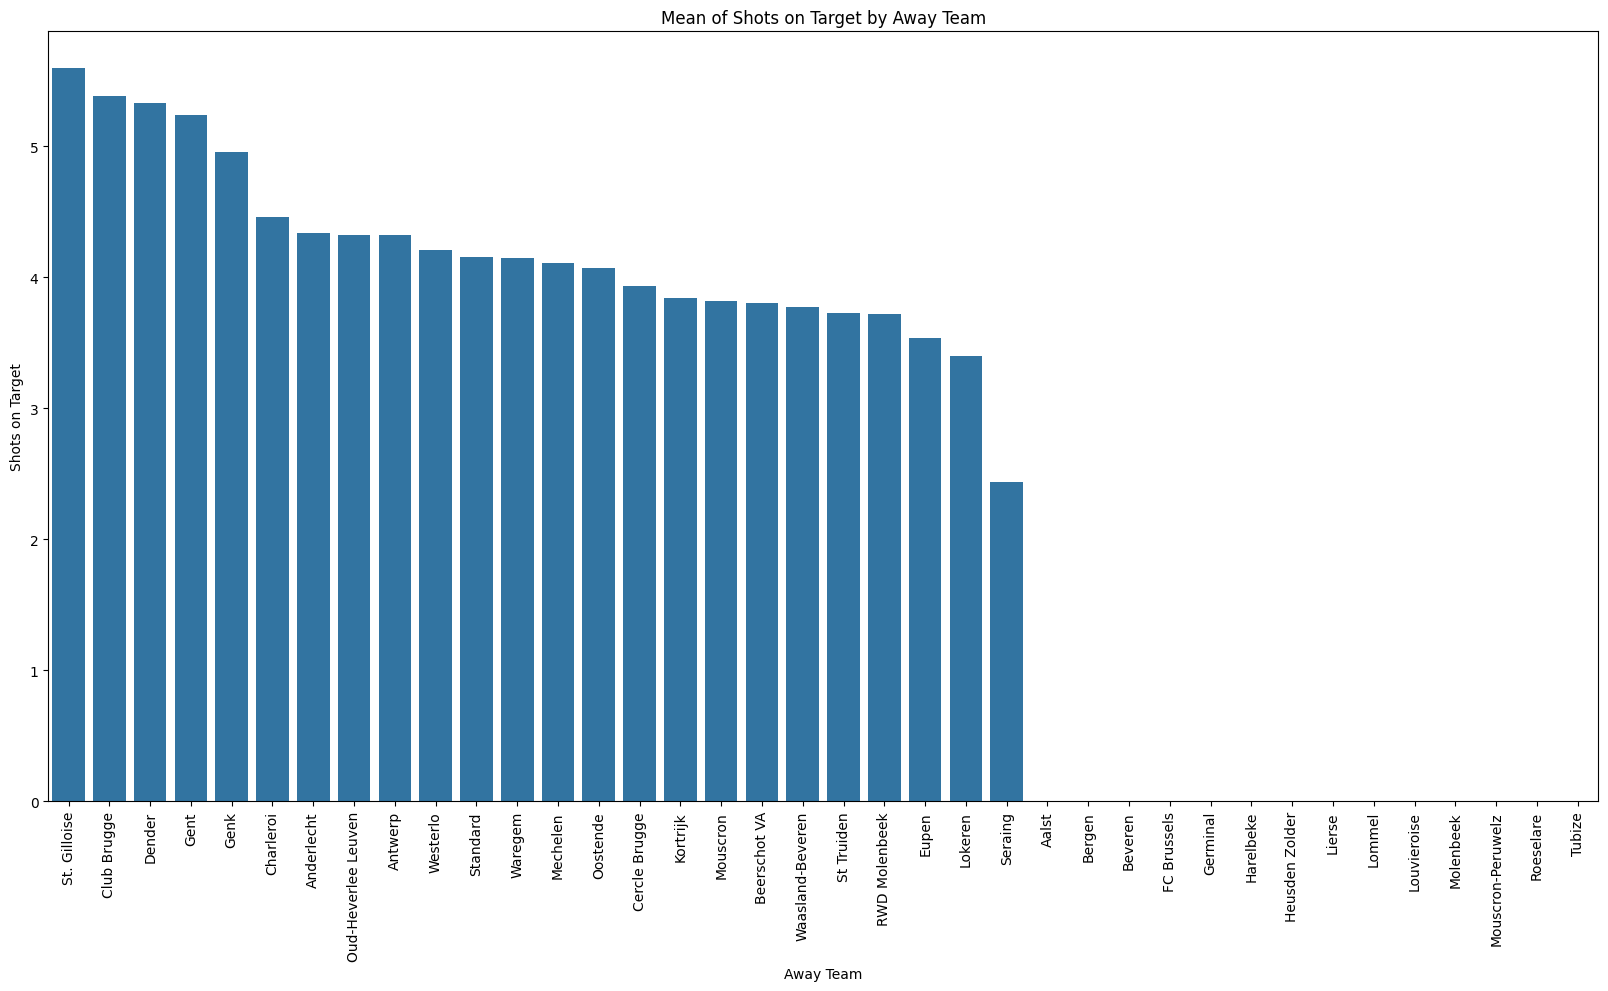

In [64]:
# Mean of shots on target by awayteam

plt.figure(figsize=(20, 10))
sns.barplot(x=df['AST'].groupby(df['AwayTeam']).mean().sort_values(ascending=False).index,y=df['AST'].groupby(df['AwayTeam']).mean().sort_values(ascending=False))
plt.title('Mean of Shots on Target by Away Team')
plt.xlabel('Away Team')
plt.ylabel('Shots on Target')
plt.xticks(rotation=90)
plt.show()


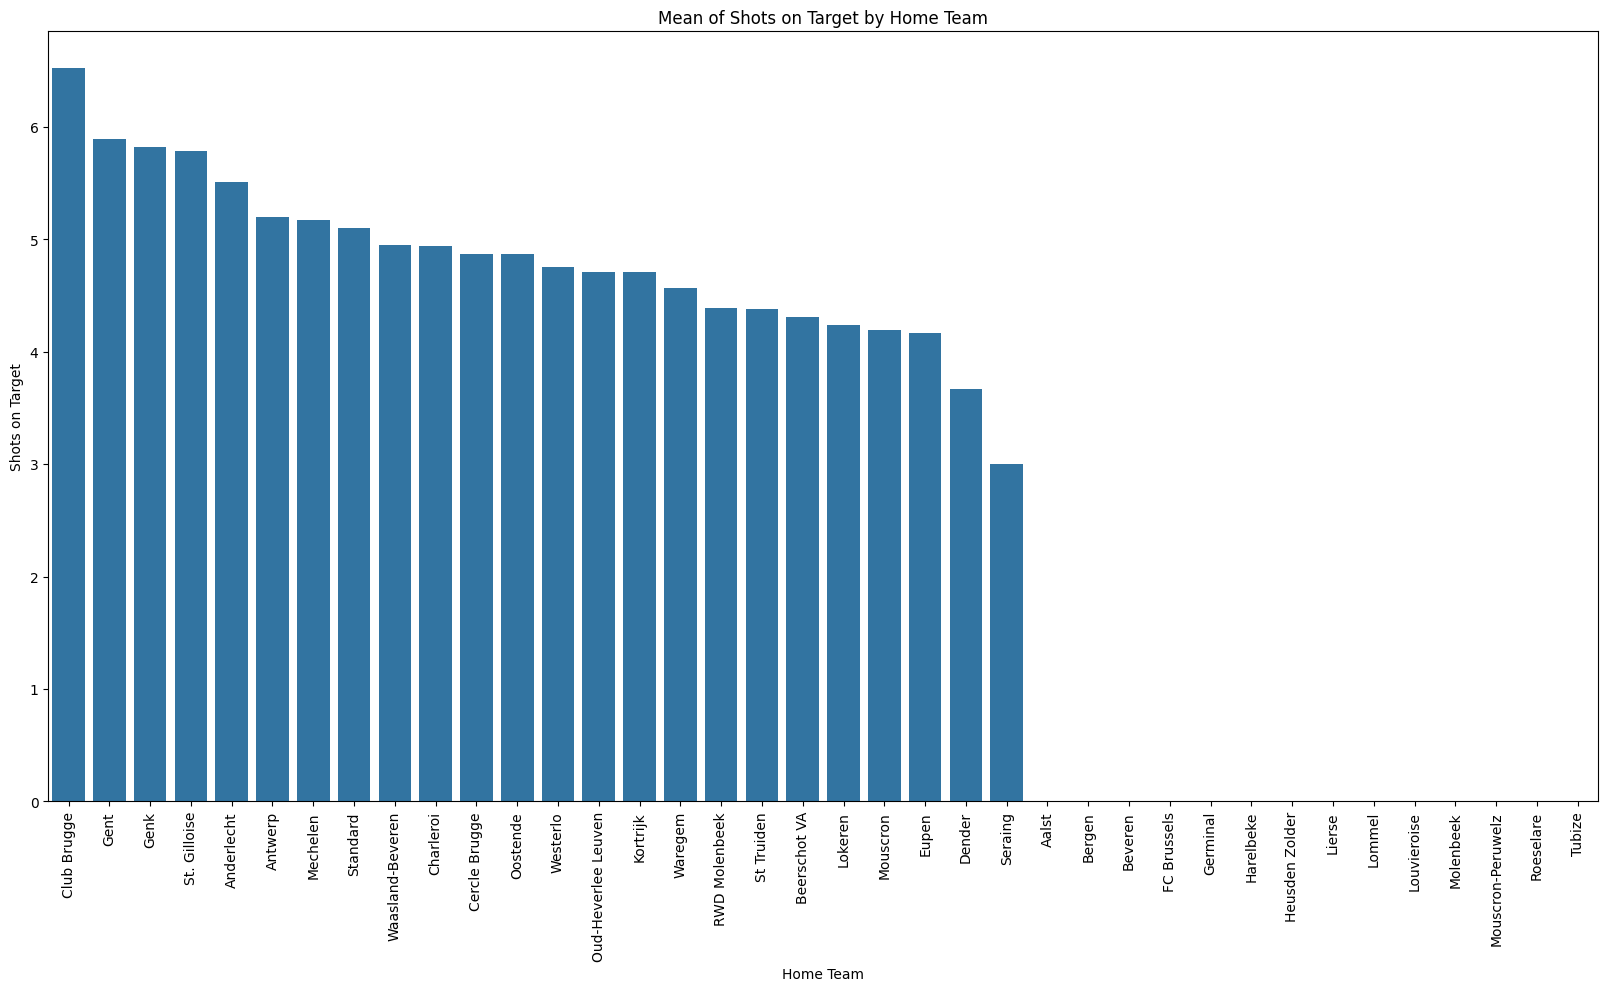

In [65]:
# Mean of shots on target by hometeam

plt.figure(figsize=(20, 10))
sns.barplot(x=df['HST'].groupby(df['HomeTeam']).mean().sort_values(ascending=False).index,y=df['HST'].groupby(df['HomeTeam']).mean().sort_values(ascending=False))
plt.title('Mean of Shots on Target by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Shots on Target')
plt.xticks(rotation=90)
plt.show()


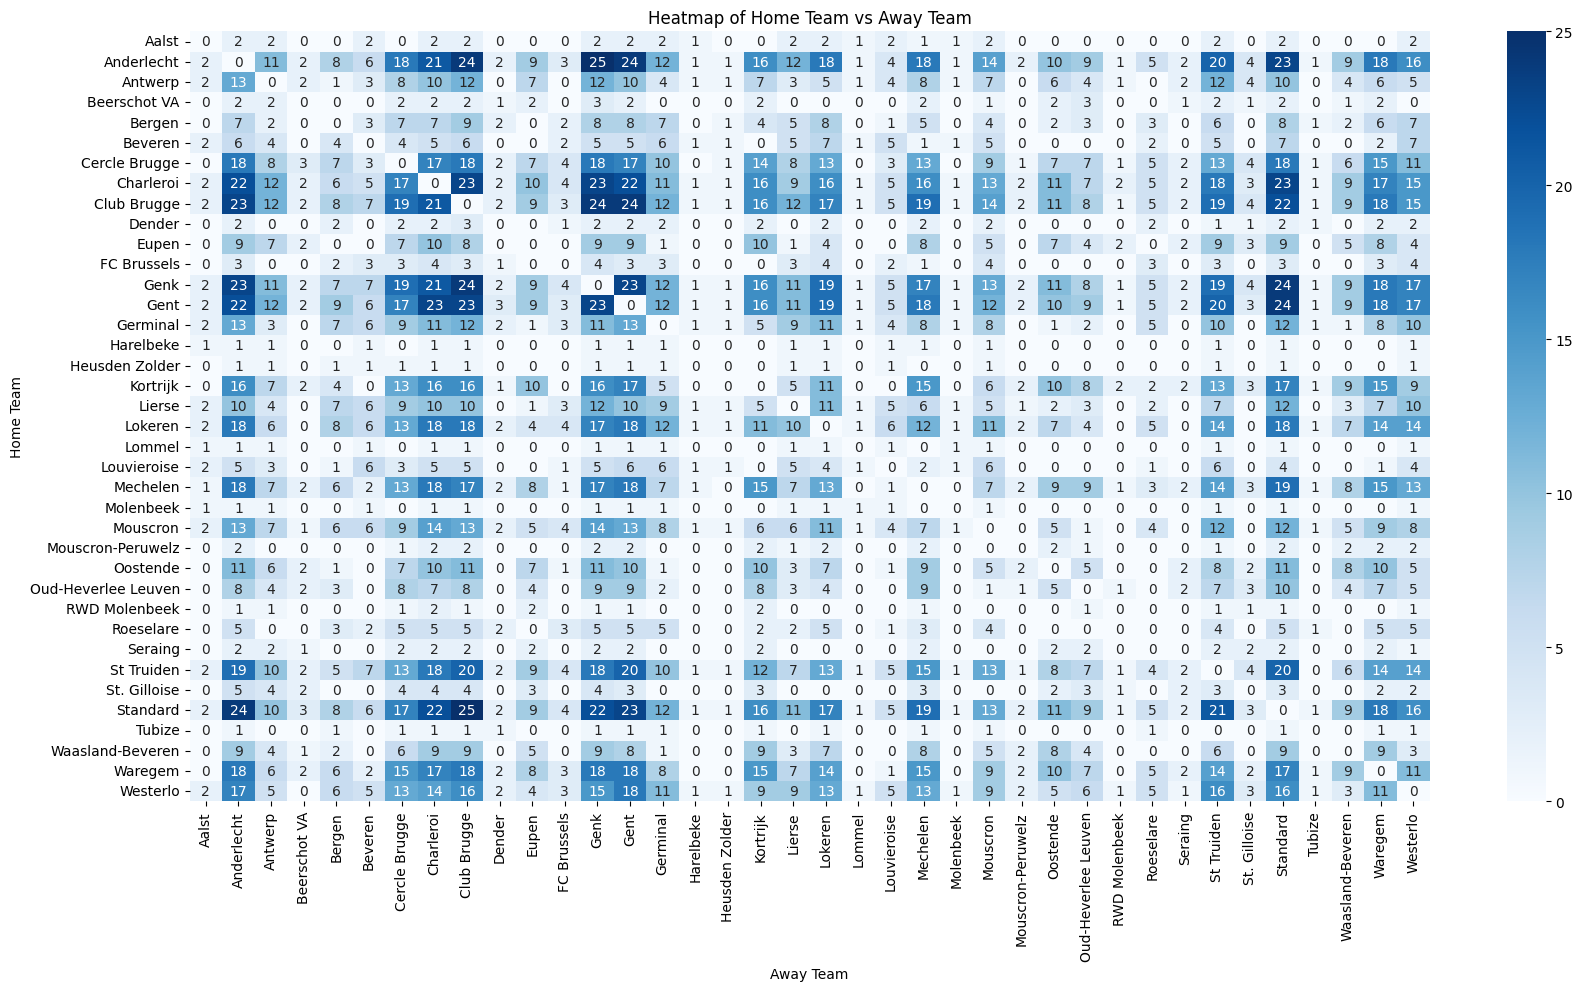

In [66]:
# Head-to-Head Records: Historical performance between the two teams.

# HomeTeam vs AwayTeam

plt.figure(figsize=(20, 10))
heatmap_data = pd.crosstab(df['HomeTeam'], df['AwayTeam'])
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt="d")
plt.title('Heatmap of Home Team vs Away Team')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.xticks(rotation=90)
plt.show()


In [67]:
# Streaks for home team and away team

'''plt.figure(figsize=(20, 10))
sns.barplot(x=df['Streak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False).index,y=df['Streak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False))
plt.title('Streaks for Home Team')
plt.xlabel('Home Team')
plt.ylabel('Streak')
plt.xticks(rotation=90)
plt.show()'''




"plt.figure(figsize=(20, 10))\nsns.barplot(x=df['Streak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False).index,y=df['Streak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False))\nplt.title('Streaks for Home Team')\nplt.xlabel('Home Team')\nplt.ylabel('Streak')\nplt.xticks(rotation=90)\nplt.show()"

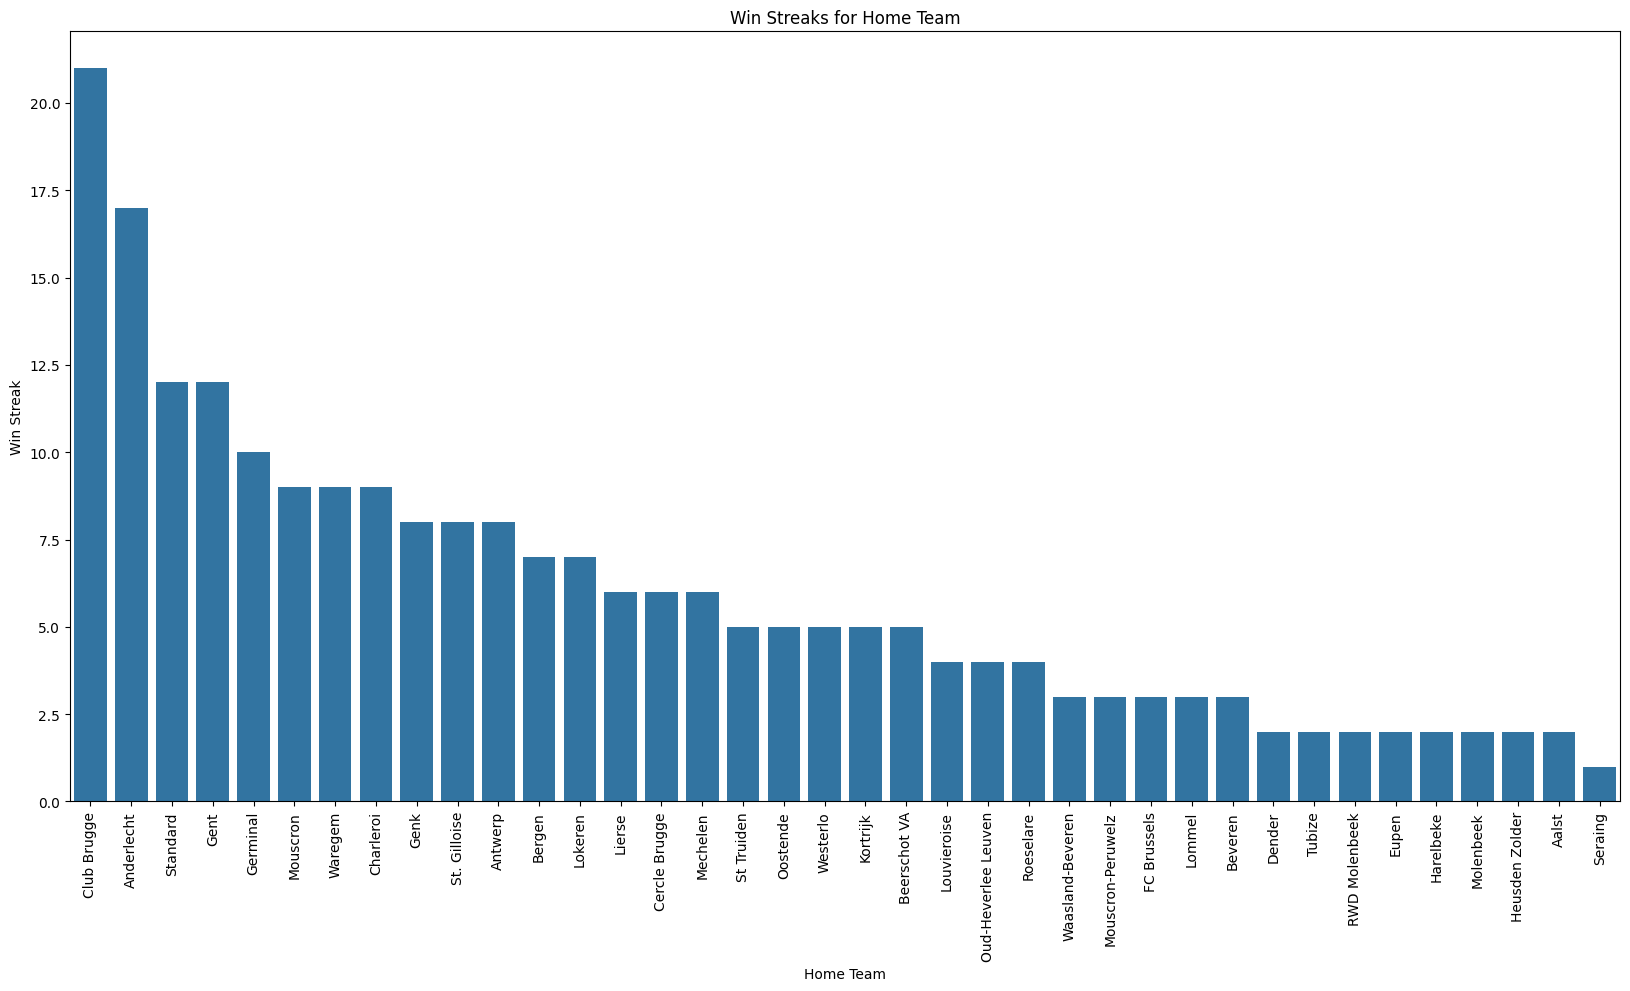

In [68]:
# win streaks for home team and away team

plt.figure(figsize=(20, 10))

sns.barplot(x=df['HomeTeamWinStreak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False).index,y=df['HomeTeamWinStreak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False))
plt.title('Win Streaks for Home Team')
plt.xlabel('Home Team')
plt.ylabel('Win Streak')
plt.xticks(rotation=90)
plt.show()




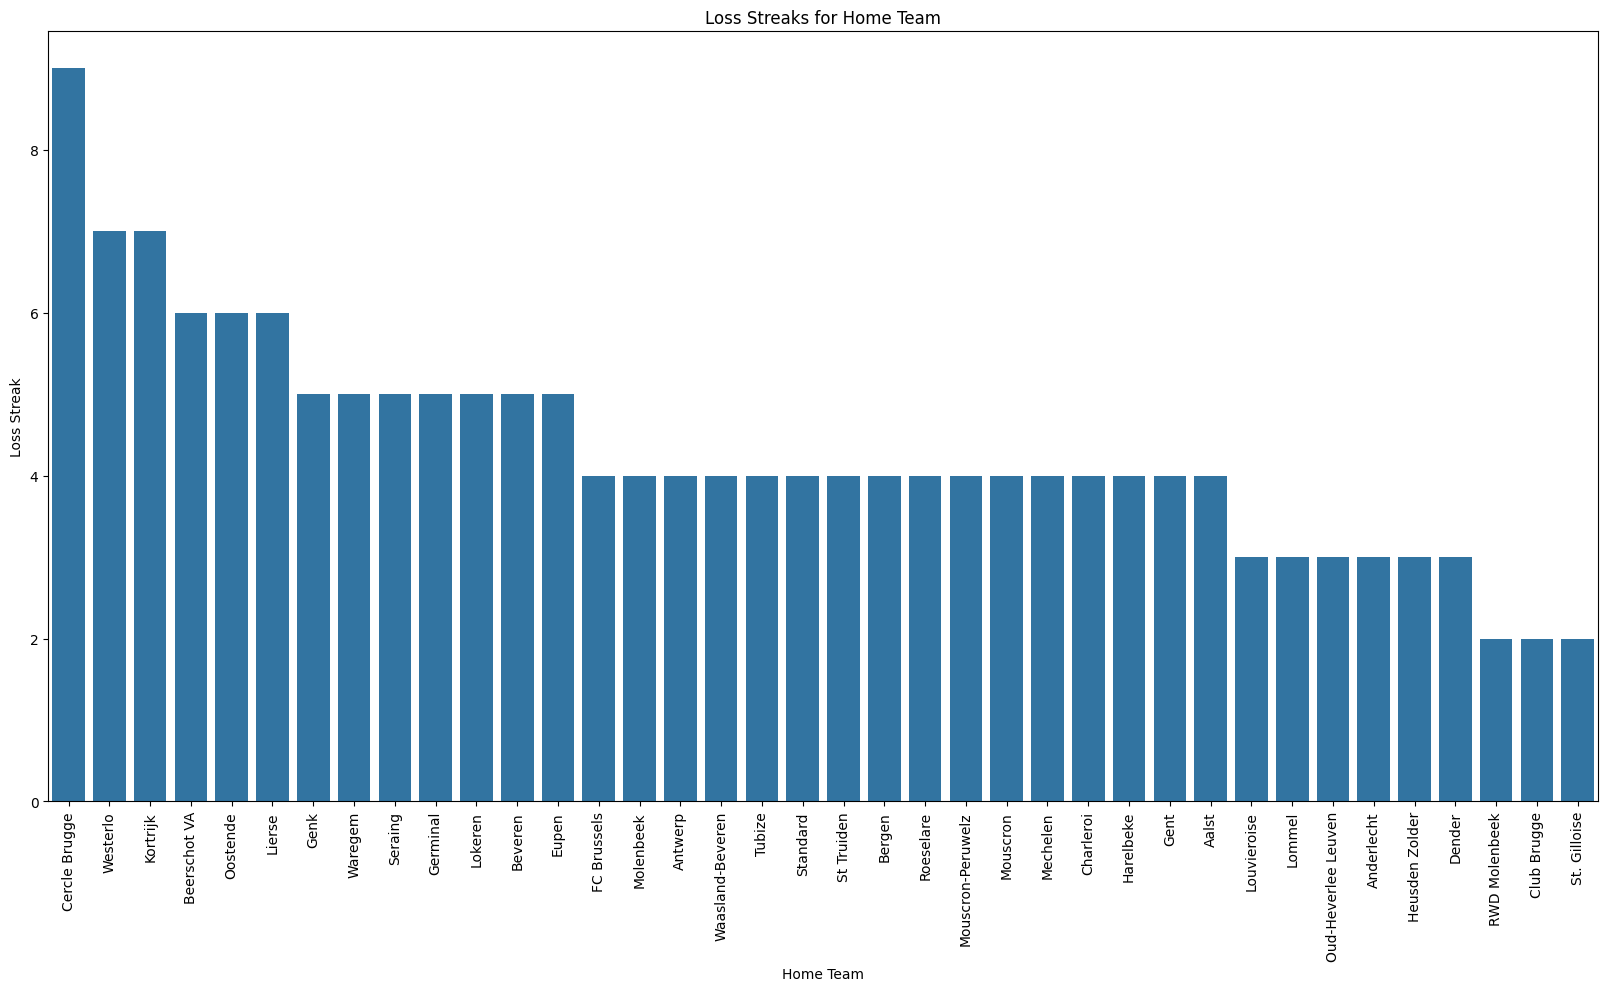

In [69]:
# loss streaks for home team and away team

plt.figure(figsize=(20, 10))
sns.barplot(x=df['HomeTeamLossStreak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False).index,y=df['HomeTeamLossStreak'].groupby(df['HomeTeam']).mean().sort_values(ascending=False))
plt.title('Loss Streaks for Home Team')
plt.xlabel('Home Team')
plt.ylabel('Loss Streak')
plt.xticks(rotation=90)
plt.show()



In [85]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA',
       'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak'],
      dtype='object')

In [70]:
import pandas as pd

# Create New DataFrame for Model Selection with raw match data and streaks
model_df = pd.DataFrame()

# Add raw features for away teams
model_df['AwayTeam'] = df['AwayTeam']
model_df['AwayGoals'] = df['FTAG']  # Full-time Away Goals
model_df['AwayShotsOnTarget'] = df['AST']  # Away Shots on Target

# Add raw features for home teams
model_df['HomeTeam'] = df['HomeTeam']
model_df['HomeGoals'] = df['FTHG']  # Full-time Home Goals
model_df['HomeShotsOnTarget'] = df['HST']  # Home Shots on Target

# Add full-time result column for raw match outcome
model_df['FullTimeResult'] = df['FTR']  # Full-time result: H (Home win), A (Away win), D (Draw)


# 1. Calculate win and loss streaks for each team

def calculate_streaks(df, team, is_home=True):
    results = df['FTR'][df['HomeTeam'] == team] if is_home else df['FTR'][df['AwayTeam'] == team]
    streaks = []
    streak = 0
    for result in results:
        if (is_home and result == 'H') or (not is_home and result == 'A'):
            streak += 1
        else:
            if streak > 0:
                streaks.append(streak)
            streak = 0
    if streak > 0:
        streaks.append(streak)
    return max(streaks) if streaks else 0

# Pre-calculate win and loss streaks for each team
home_team_win_streaks = {team: calculate_streaks(df, team, is_home=True) for team in df['HomeTeam'].unique()}
away_team_win_streaks = {team: calculate_streaks(df, team, is_home=False) for team in df['AwayTeam'].unique()}
home_team_loss_streaks = {team: calculate_streaks(df, team, is_home=True) for team in df['HomeTeam'].unique()}
away_team_loss_streaks = {team: calculate_streaks(df, team, is_home=False) for team in df['AwayTeam'].unique()}

# Map streaks to the DataFrame
model_df['HomeTeamWinStreak'] = df['HomeTeam'].map(home_team_win_streaks)
model_df['AwayTeamWinStreak'] = df['AwayTeam'].map(away_team_win_streaks)
model_df['HomeTeamLossStreak'] = df['HomeTeam'].map(home_team_loss_streaks)
model_df['AwayTeamLossStreak'] = df['AwayTeam'].map(away_team_loss_streaks)

# Display the first few rows of the new DataFrame
print(model_df.head())



     AwayTeam  AwayGoals  AwayShotsOnTarget     HomeTeam  HomeGoals  \
0  Anderlecht        1.0                NaN     Mechelen        0.0   
1   Roeselare        1.0                NaN    Charleroi        1.0   
2      Bergen        1.0                NaN  Club Brugge        2.0   
3    Germinal        2.0                NaN       Dender        1.0   
4    Westerlo        1.0                NaN  FC Brussels        0.0   

   HomeShotsOnTarget FullTimeResult  HomeTeamWinStreak  AwayTeamWinStreak  \
0                NaN              A                  6                 12   
1                NaN              D                  9                  1   
2                NaN              H                 21                  3   
3                NaN              A                  2                  3   
4                NaN              A                  3                  3   

   HomeTeamLossStreak  AwayTeamLossStreak  
0                   6                  12  
1                   9 

In [71]:
model_df.columns

Index(['AwayTeam', 'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam', 'HomeGoals',
       'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak'],
      dtype='object')

In [72]:
model_df.to_csv('../Preprocessing/model_df.csv', index=False)

In [86]:
# combine csv files in one df for model

# Concatenate the DataFrames
combined_df = pd.concat([df_2, model_df])

# Save the combined CSV to a new file
combined_df.to_csv('../Preprocessing/combined_file.csv', index=False)

combined_df.columns


Index(['name', 'position', 'age', 'club', 'market', 'club_value', 'AwayTeam',
       'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam', 'HomeGoals',
       'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak'],
      dtype='object')

# Model selection

In [84]:
import joblib
import pickle
import os


# Import the combined CSV file

combined_df = pd.read_csv('../Preprocessing/combined_file.csv')

# Encode the categorical features

label_encoder = LabelEncoder()

def encode_categorical_features(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
    
    return df

df_encoded = encode_categorical_features(combined_df)


# Save the label encoder to the specified path
path = '../Streamlit/'
filename = 'label_encoder.pkl'  # Naming the file appropriately for the encoder
file_path = os.path.join(path, filename)

# Save the label encoder
with open(file_path, 'wb') as f:
    pickle.dump(label_encoder, f)

print(f"Encoder saved to {file_path}")




Encoder saved to ../Streamlit/label_encoder.pkl


In [75]:
# Fill missing values with KNN

from sklearn.impute import KNNImputer

def fill_missing_values(df):
    imputer = KNNImputer(n_neighbors=10)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

df_imputed = fill_missing_values(df_encoded)



In [76]:
df_imputed.columns

Index(['name', 'position', 'age', 'club', 'market', 'club_value', 'AwayTeam',
       'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam', 'HomeGoals',
       'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak'],
      dtype='object')

In [77]:
# Check for multicollinearity using Variance Inflation Factor (VIF)


import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns representing the independent variables (features)
X = df_imputed[['name', 'position', 'age', 'club', 'market', 'club_value', 'AwayTeam',
       'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam', 'HomeGoals',
       'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak']]

# Add a constant (intercept) for VIF calculation
X = sm.add_constant(X)

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Feature          VIF
0                const  3301.649096
1                 name     3.003938
2             position     3.088086
3                  age     1.252195
4                 club     4.319181
5               market     1.088100
6           club_value     3.485049
7             AwayTeam     1.202109
8            AwayGoals     2.498289
9    AwayShotsOnTarget     1.434158
10            HomeTeam     1.222693
11           HomeGoals     2.520560
12   HomeShotsOnTarget     1.401163
13      FullTimeResult     3.977654
14   HomeTeamWinStreak          inf
15   AwayTeamWinStreak          inf
16  HomeTeamLossStreak          inf
17  AwayTeamLossStreak          inf


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [78]:
df_imputed

,name,position,age,club,market,club_value,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,HomeTeamLossStreak,AwayTeamLossStreak
0,5.0,10.0,24.0,0.0,18.00,1.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
1,3.0,10.0,26.0,7.0,15.00,0.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
2,36.0,3.0,26.0,7.0,12.00,0.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
3,41.0,2.0,27.0,11.0,10.00,11.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
4,68.0,4.0,23.0,0.0,10.00,1.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,88.0,12.0,26.0,12.0,5.48,12.0,29.0,0.0,4.3,18.0,1.0,4.4,2.0,6.0,1.0,6.0,1.0
6383,88.0,12.0,26.0,12.0,5.48,12.0,14.0,2.0,5.4,19.0,1.0,5.5,0.0,7.0,3.0,7.0,3.0
6384,88.0,12.0,26.0,12.0,5.48,12.0,11.0,1.0,3.2,31.0,0.0,3.6,0.0,5.0,2.0,5.0,2.0
6385,88.0,12.0,26.0,12.0,5.48,12.0,13.0,2.0,4.4,33.0,0.0,3.7,0.0,12.0,6.0,12.0,6.0


In [79]:
# Drop useless columns

df_imputed.drop(['age','name', 'position', 'club', 'market'], axis=1, inplace=True)

df_imputed



,club_value,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,HomeTeamLossStreak,AwayTeamLossStreak
0,1.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
1,0.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
2,0.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
3,11.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
4,1.0,38.0,1.0,5.5,38.0,2.3,6.0,3.0,7.4,4.2,7.4,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
6382,12.0,29.0,0.0,4.3,18.0,1.0,4.4,2.0,6.0,1.0,6.0,1.0
6383,12.0,14.0,2.0,5.4,19.0,1.0,5.5,0.0,7.0,3.0,7.0,3.0
6384,12.0,11.0,1.0,3.2,31.0,0.0,3.6,0.0,5.0,2.0,5.0,2.0
6385,12.0,13.0,2.0,4.4,33.0,0.0,3.7,0.0,12.0,6.0,12.0,6.0


In [80]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X = df_imputed.drop('FullTimeResult', axis=1)
y = df_imputed['FullTimeResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




XGBoost: 1.00
Random Forest: 1.00
Gradient Boosting: 1.00
SVM: 0.91
Logistic Regression: 1.00
K-Nearest Neighbors: 0.66


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


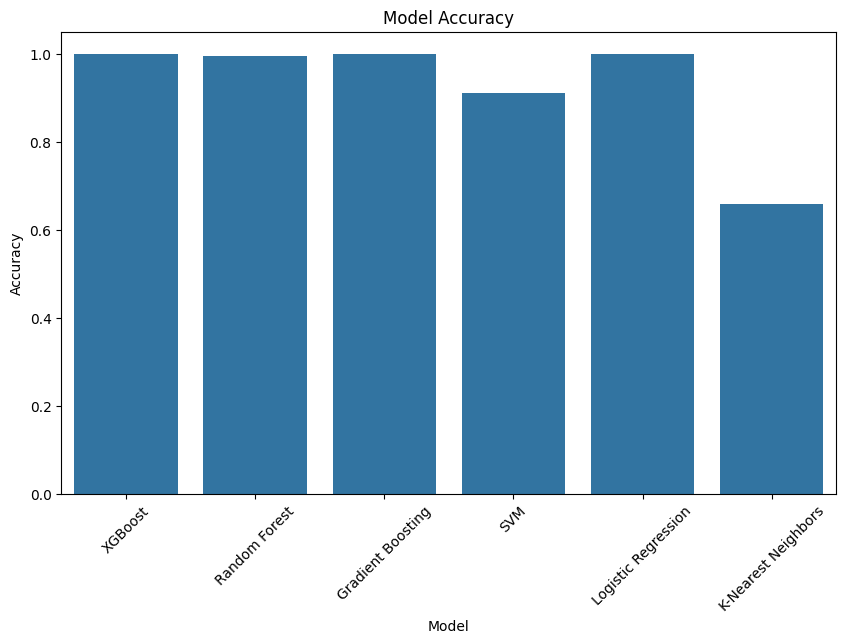

Model saved to ../Streamlit/XGBoost.pkl


In [82]:
# Try other models

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import os
from xgboost import XGBClassifier


# Create the models

models = {
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a dictionary to store the accuracy of each model
accuracy_dict = {}

# Loop through each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Print the accuracy of each model

for name, accuracy in accuracy_dict.items():
    print(f'{name}: {accuracy:.2f}')


# Plot the accuracy of each model

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# save the model to pkl file

import pickle

# Save the best model to Streamlit folder

best_model = max(accuracy_dict, key=accuracy_dict.get)
model = models[best_model]

# Save the best model to the specified path
path = '../Streamlit/'
filename = f'{best_model}.pkl'
file_path = os.path.join(path, filename)

# Save the model
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {file_path}")